In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
dataset = pd.read_csv('peerj-cs-07-687-s001.csv')
dataset

,Location,Address,Period,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Cloud Cover,Relative Humidity,Unnamed: 11,Disease
0,"Karjat, MH, India","Karjat, MH, India",Week 1 (Jan) 2000,33.1,17.5,25.4,32.3,0.0,14.8,0.3,48.93,NaN,Stem Rot
1,"Karjat, MH, India","Karjat, MH, India",Week 2 (Jan) 2000,33.1,11.2,24.8,32.0,0.0,18.4,2.4,42.30,NaN,Blast
2,"Karjat, MH, India","Karjat, MH, India",Week 3 (Jan) 2000,31.1,11.2,24.3,31.9,0.0,22.3,5.5,57.20,NaN,Blast
3,"Karjat, MH, India","Karjat, MH, India",Week 4 (Jan) 2000,37.1,17.2,26.3,39.4,0.0,22.3,7.6,53.69,NaN,Stem Rot
4,"Karjat, MH, India","Karjat, MH, India",Week 5 (Jan) 2000,34.1,17.3,25.9,32.8,0.0,18.4,1.1,44.75,NaN,Stem Rot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,"Karjat, MH, India","Karjat, MH, India",Week 49 (Dec) 1989,32.1,14.2,24.2,31.0,0.0,14.8,3.5,57.38,NaN,Blast
1638,"Karjat, MH, India","Karjat, MH, India",Week 50 (Dec) 1989,34.1,15.1,23.7,32.8,0.0,11.2,6.8,53.15,NaN,Blast
1639,"Karjat, MH, India","Karjat, MH, India",Week 51 (Dec) 1989,33.2,13.9,22.9,31.5,0.0,10.6,12.2,53.12,NaN,Blast
1640,"Karjat, MH, India","Karjat, MH, India",Week 52 (Dec) 1989,30.1,14.9,22.4,29.0,0.0,12.3,21.4,59.59,NaN,Blast


In [3]:
dataset.head()

,Location,Address,Period,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Cloud Cover,Relative Humidity,Unnamed: 11,Disease
0,"Karjat, MH, India","Karjat, MH, India",Week 1 (Jan) 2000,33.1,17.5,25.4,32.3,0.0,14.8,0.3,48.93,NaN,Stem Rot
1,"Karjat, MH, India","Karjat, MH, India",Week 2 (Jan) 2000,33.1,11.2,24.8,32.0,0.0,18.4,2.4,42.30,NaN,Blast
2,"Karjat, MH, India","Karjat, MH, India",Week 3 (Jan) 2000,31.1,11.2,24.3,31.9,0.0,22.3,5.5,57.20,NaN,Blast
3,"Karjat, MH, India","Karjat, MH, India",Week 4 (Jan) 2000,37.1,17.2,26.3,39.4,0.0,22.3,7.6,53.69,NaN,Stem Rot
4,"Karjat, MH, India","Karjat, MH, India",Week 5 (Jan) 2000,34.1,17.3,25.9,32.8,0.0,18.4,1.1,44.75,NaN,Stem Rot


In [4]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Unnamed: 11 1.0  % missing values


In [5]:
df=dataset.drop(['Location','Address','Period','Unnamed: 11','Precipitation','Maximum Temperature','Minimum Temperature'],axis=1)
df

,Temperature,Heat Index,Wind Speed,Cloud Cover,Relative Humidity,Disease
0,25.4,32.3,14.8,0.3,48.93,Stem Rot
1,24.8,32.0,18.4,2.4,42.30,Blast
2,24.3,31.9,22.3,5.5,57.20,Blast
3,26.3,39.4,22.3,7.6,53.69,Stem Rot
4,25.9,32.8,18.4,1.1,44.75,Stem Rot
...,...,...,...,...,...,...
1637,24.2,31.0,14.8,3.5,57.38,Blast
1638,23.7,32.8,11.2,6.8,53.15,Blast
1639,22.9,31.5,10.6,12.2,53.12,Blast
1640,22.4,29.0,12.3,21.4,59.59,Blast


In [6]:
dataset.dtypes

Location                object
Address                 object
Period                  object
Maximum Temperature    float64
Minimum Temperature    float64
Temperature            float64
Heat Index             float64
Precipitation          float64
Wind Speed             float64
Cloud Cover            float64
Relative Humidity      float64
Unnamed: 11            float64
Disease                 object
dtype: object

<AxesSubplot:>

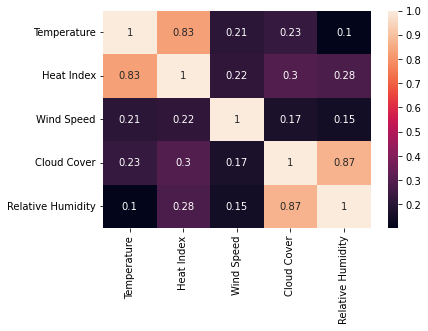

In [7]:
sns.heatmap(df.corr(),annot=True)

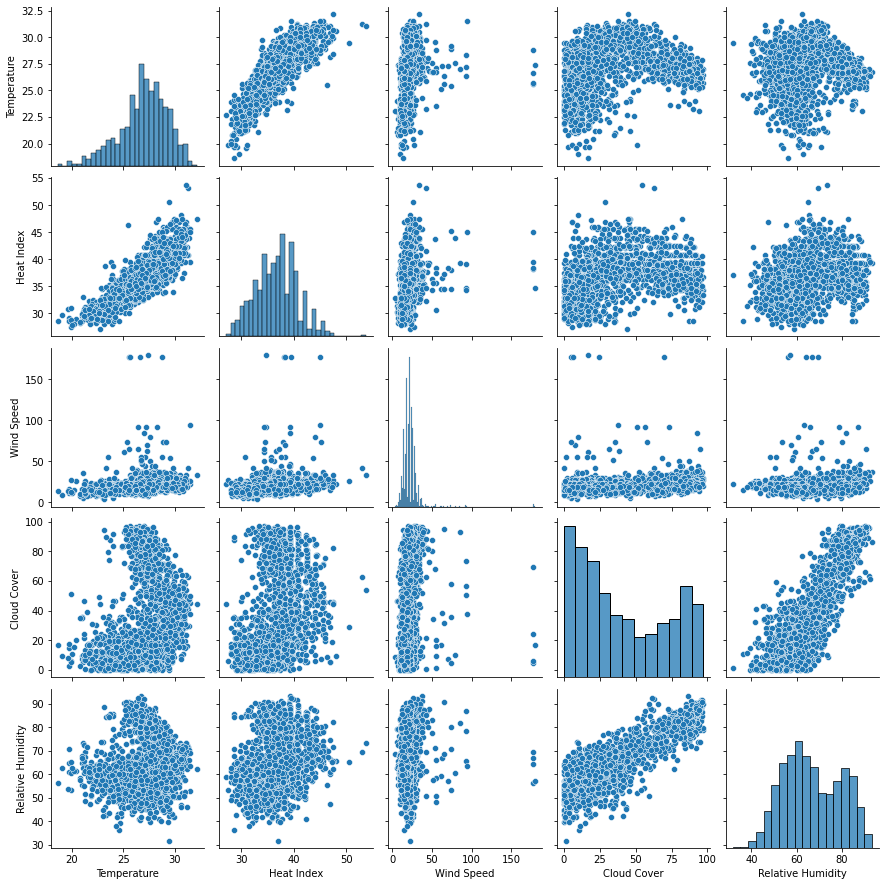

In [8]:
sns.pairplot(df)

In [9]:
df[50:100]

,Temperature,Heat Index,Wind Speed,Cloud Cover,Relative Humidity,Disease
50,24.6,33.0,16.6,8.6,56.56,Blast
51,25.0,34.1,14.8,7.2,55.36,Stem Rot
52,24.7,33.8,20.5,34.2,57.75,Blast
53,24.1,33.5,20.5,20.7,64.99,Blast
54,23.6,30.5,16.6,13.1,63.21,Blast
55,25.4,33.1,22.3,23.9,59.31,Stem Rot
56,22.1,29.9,18.4,19.5,57.74,Blast
57,23.6,30.5,18.4,36.7,55.83,Blast
58,22.9,34.5,18.4,3.5,56.79,Blast
59,22.8,31.2,18.4,5.3,63.16,Blast


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X

array([[25.4 , 32.3 , 14.8 ,  0.3 , 48.93],
       [24.8 , 32.  , 18.4 ,  2.4 , 42.3 ],
       [24.3 , 31.9 , 22.3 ,  5.5 , 57.2 ],
       ...,
       [22.9 , 31.5 , 10.6 , 12.2 , 53.12],
       [22.4 , 29.  , 12.3 , 21.4 , 59.59],
       [22.6 , 30.1 , 12.3 , 49.1 , 62.23]])

### y

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y[73]

2

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
X_test

array([[24.4 , 32.3 , 18.4 , 22.4 , 51.07],
       [26.7 , 32.7 , 29.  , 12.9 , 55.93],
       [29.7 , 38.  , 19.7 ,  8.9 , 56.66],
       ...,
       [29.  , 42.5 , 20.5 , 31.4 , 64.77],
       [26.4 , 37.2 , 65.6 , 31.4 , 68.44],
       [27.6 , 38.1 , 18.4 , 81.3 , 80.36]])

In [16]:
X_train

array([[24.5 , 30.6 , 24.1 , 21.5 , 42.99],
       [27.9 , 35.4 , 24.1 , 21.8 , 58.12],
       [28.8 , 35.6 , 21.  , 49.9 , 67.92],
       ...,
       [27.  , 34.3 , 18.4 , 68.5 , 77.2 ],
       [28.3 , 37.8 , 29.5 , 78.6 , 65.96],
       [23.6 , 35.3 , 14.8 ,  1.2 , 57.67]])

In [17]:
y_train

array([0, 3, 3, ..., 3, 3, 0])

In [18]:
y_test

array([0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 0, 0, 0, 2, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 3, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3,
       1, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,1,2,3,4]] = sc.fit_transform(X_train[:,[0,1,2,3,4] ])
X_test[:,  [0,1,2,3,4]] = sc.transform(X_test[:,  [0,1,2,3,4]])

In [20]:
X_train

array([[-1.1061163 , -1.54749621,  0.15704563, -0.63720524, -1.9227699 ],
       [ 0.38493796, -0.36759564,  0.15704563, -0.62738624, -0.70610794],
       [ 0.77962879, -0.31843312, -0.14431821,  0.2923264 ,  0.08194805],
       ...,
       [-0.00975287, -0.63798952, -0.39707497,  0.90110416,  0.82818882],
       [ 0.5603561 ,  0.22235464,  0.68200199,  1.23167703, -0.07566315],
       [-1.50080713, -0.3921769 , -0.74704588, -1.30162398, -0.74229419]])

In [21]:
X_test

array([[-1.14997083, -1.12961476, -0.39707497, -0.60774825, -1.27302577],
       [-0.14131649, -1.03128971,  0.63339492, -0.91868313, -0.88221433],
       [ 1.17431962,  0.27151717, -0.27069659, -1.04960308, -0.8235122 ],
       ...,
       [ 0.86733786,  1.37767395, -0.19292528, -0.31317837, -0.17135566],
       [-0.2728801 ,  0.07486707,  4.19143249, -0.31317837,  0.12376326],
       [ 0.25337435,  0.29609843, -0.39707497,  1.32004799,  1.08229668]])

In [22]:

X_train

array([[-1.1061163 , -1.54749621,  0.15704563, -0.63720524, -1.9227699 ],
       [ 0.38493796, -0.36759564,  0.15704563, -0.62738624, -0.70610794],
       [ 0.77962879, -0.31843312, -0.14431821,  0.2923264 ,  0.08194805],
       ...,
       [-0.00975287, -0.63798952, -0.39707497,  0.90110416,  0.82818882],
       [ 0.5603561 ,  0.22235464,  0.68200199,  1.23167703, -0.07566315],
       [-1.50080713, -0.3921769 , -0.74704588, -1.30162398, -0.74229419]])

In [23]:
X_test

array([[-1.14997083, -1.12961476, -0.39707497, -0.60774825, -1.27302577],
       [-0.14131649, -1.03128971,  0.63339492, -0.91868313, -0.88221433],
       [ 1.17431962,  0.27151717, -0.27069659, -1.04960308, -0.8235122 ],
       ...,
       [ 0.86733786,  1.37767395, -0.19292528, -0.31317837, -0.17135566],
       [-0.2728801 ,  0.07486707,  4.19143249, -0.31317837,  0.12376326],
       [ 0.25337435,  0.29609843, -0.39707497,  1.32004799,  1.08229668]])

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [25]:
df

,Temperature,Heat Index,Wind Speed,Cloud Cover,Relative Humidity,Disease
0,25.4,32.3,14.8,0.3,48.93,Stem Rot
1,24.8,32.0,18.4,2.4,42.30,Blast
2,24.3,31.9,22.3,5.5,57.20,Blast
3,26.3,39.4,22.3,7.6,53.69,Stem Rot
4,25.9,32.8,18.4,1.1,44.75,Stem Rot
...,...,...,...,...,...,...
1637,24.2,31.0,14.8,3.5,57.38,Blast
1638,23.7,32.8,11.2,6.8,53.15,Blast
1639,22.9,31.5,10.6,12.2,53.12,Blast
1640,22.4,29.0,12.3,21.4,59.59,Blast


In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred)), y_test.reshape(len(y_test)))))

[0 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3
 3 3 3 3 3 0 3 3 0 0 0 2 3 1 3 3 3 3 0 3 3 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 2 0 3 2 0 3 3 2 3 3 3 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 0
 3 3 0 3 0 3 3 0 3 3 3 3 0 0 0 3 3 0 0 0 2 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 2 3 3 2 0 3 3 3
 3 0 3 3 3 3 3 3 3 2 3 0 3 0 3 3 0 3 0 3 0 3 2 3 3 3 3 0 0 3 3 3 3 0 0 3 3
 3 3 3 3 3 3 2 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3
 3 3 3 2 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 3 3 3 3 3 3 2 0 3 3 0 3 2 2 3 3 3 3 3 2 3 2 3 0 0 3 3 3 3 3 3 0 3 3 3
 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3
 3 0 3 3 0 0 0 2 3 1 3 3 3 3 0 3 3 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2
 0 3 2 0 3 2 2 3 3 3 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 0 3 3 0 3
 0 3 3 0 3 3 3 3 0 0 0 3 3 0 0 0 2 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 3 3 3 3 

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 59   0   0   1]
 [  1   1   0   0]
 [  0   0  18   2]
 [  0   0   0 247]]


0.9878419452887538

<function matplotlib.pyplot.show(close=None, block=None)>

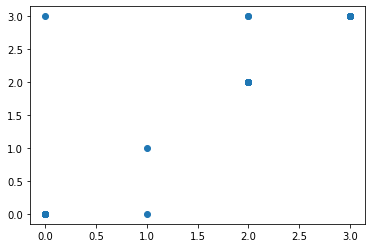

In [28]:

plt.scatter(y_test,y_pred)
plt.show

In [29]:
#Saving model to disk

In [30]:
pickle.dump(classifier,open('Plant Diseases.pkl','wb'))

In [31]:
#Loading the model to compare the results 

In [32]:
Diseases=pickle.load(open('Plant Diseases.pkl','rb'))

In [33]:
print(Diseases.predict(sc.transform([[24.8,32.0,18.4,2.4,42.30]])))

[0]
